In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [10]:

h = 0.00002
ein = 1
a11 = -55
a21 = -1e4
a22 = -21.5
b1 = -a11
b2 = -a21
N = 15000

v1 = np.zeros(N + 1)
v2 = np.zeros(N + 1)

In [11]:

def del_v1(v1):
    return a11 * v1 + b1 * ein

def del_v2(v1, v2):
    return a21 * v1 + a22 * v2 + b2 * ein

In [12]:
for i in range(N):
   
    m1 = del_v1(v1[i])
    m2 = del_v1(v1[i] + m1 * h / 2)
    m3 = del_v1(v1[i] + m2 * h / 2)
    m4 = del_v1(v1[i] + m3 * h)
    v1[i + 1] = v1[i] + h * (m1 + 2 * m2 + 2 * m3 + m4) / 6

 
    dv1 = v1[i + 1] - v1[i]
    m1 = del_v2(v1[i], v2[i])
    m2 = del_v2(v1[i] + dv1 / 2, v2[i] + m1 * h / 2)
    m3 = del_v2(v1[i] + dv1 / 2, v2[i] + m2 * h / 2)
    m4 = del_v2(v1[i] + dv1, v2[i] + m3 * h)
    v2[i + 1] = v2[i] + h * (m1 + 2 * m2 + 2 * m3 + m4) / 6

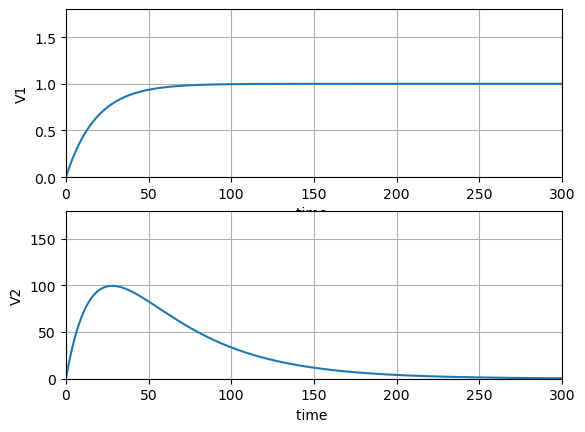

In [14]:
t = np.arange(0, (N + 1) * h * 1000, h * 1000)

plt.subplot(2, 1, 1)
plt.plot(t, v1)
plt.grid()
plt.axis([0, 300, 0, 1.8])
plt.xlabel('time ')
plt.ylabel('V1')

plt.subplot(2, 1, 2)
plt.plot(t, v2)
plt.grid()
plt.axis([0, 300, 0, 180])
plt.xlabel('time ')
plt.ylabel('V2')

plt.show()